#EDA & Data Preparation

**Dataset infomation**

In [1]:
# Import the packages
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
mci = pd.read_csv('MCI.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Head
mci.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8859955.190,5424371.891,110,GO-20141625305,D23,2014/03/02 05:00:00+00,2014/03/02 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,...,2,61,Sunday,8,Assault,1,West Humber-Clairville,-79.590332,43.734013,1
1,-8861109.529,5424036.238,188,GO-20141272968,D23,2013/12/24 05:00:00+00,2014/01/03 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,1610,...,24,358,Tuesday,22,Robbery,1,West Humber-Clairville,-79.600701,43.731834,2
2,-8861119.801,5417042.986,287,GO-20141284361,D23,2013/01/05 05:00:00+00,2014/01/05 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,1430,...,5,5,Saturday,4,Assault,1,West Humber-Clairville,-79.600794,43.686423,3
3,-8861462.901,5425855.512,384,GO-20141292177,D23,2013/12/31 05:00:00+00,2014/01/06 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2120,...,31,365,Tuesday,21,Break and Enter,1,West Humber-Clairville,-79.603876,43.743642,4
4,-8859522.263,5418688.023,438,GO-20141297201,D23,2014/01/03 05:00:00+00,2014/01/07 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2120,...,3,3,Friday,10,Break and Enter,1,West Humber-Clairville,-79.586443,43.697108,5


In [ ]:
# Check the shape
mci.shape

(281692, 30)

In [ ]:
# Check the column names
mci.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'MCI',
       'Hood_ID', 'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [3]:
# Change the column name
mci = mci.rename(columns = {'Index_' : 'Index'})
mci.columns

Index(['X', 'Y', 'Index', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'MCI',
       'Hood_ID', 'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

Only occurrencemonth and occurrencedayofweek have null values.

**Variable information**

In [ ]:
# Check the null values
print(mci.isnull().sum())

X                       0
Y                       0
Index                   0
event_unique_id         0
Division                0
occurrencedate          0
reporteddate            0
location_type           0
premises_type           0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear          0
occurrencemonth        95
occurrenceday           0
occurrencedayofyear     0
occurrencedayofweek    95
occurrencehour          0
MCI                     0
Hood_ID                 0
Neighbourhood           0
Long                    0
Lat                     0
ObjectId                0
dtype: int64


In [ ]:
# Check the similar columns
# location_type and premises_type
mci.premises_type .value_counts()

Outside        74899
Apartment      67468
Commercial     56973
House          50689
Other          16394
Transit         7886
Educational     7383
Name: premises_type, dtype: int64

In [ ]:
mci.location_type .value_counts()

Apartment (Rooming House, Condo)                                          67468
Single Home, House (Attach Garage, Cottage, Mobile)                       50689
Streets, Roads, Highways (Bicycle Path, Private Road)                     44763
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    32462
Parking Lots (Apt., Commercial Or Non-Commercial)                         23301
Bar / Restaurant                                                          11342
Open Areas (Lakes, Parks, Rivers)                                          6032
Schools During Supervised Activity                                         4332
Convenience Stores                                                         3600
Ttc Subway Station                                                         3315
Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)          3270
Schools During Un-Supervised Activity                                      2521
Hospital / Institutions / Medical Facili

The values in location_type are aggregated into fewer categories in premises_type.

In [ ]:
# Check the similar columns
# offence and MCI
mci.MCI.value_counts()

Assault            151808
Break and Enter     56466
Auto Theft          36334
Robbery             27820
Theft Over           9264
Name: MCI, dtype: int64

In [ ]:
mci.offence.value_counts()

Assault                           103627
B&E                                47662
Theft Of Motor Vehicle             36334
Assault With Weapon                25345
Robbery - Mugging                   8159
B&E W'Intent                        6977
Assault Bodily Harm                 6682
Theft Over                          5164
Assault Peace Officer               4845
Robbery - Other                     4605
Robbery With Weapon                 4561
Robbery - Business                  3975
Assault - Resist/ Prevent Seiz      2888
Aggravated Assault                  2384
Theft From Motor Vehicle Over       2245
Robbery - Swarming                  2242
Discharge Firearm With Intent       1929
Unlawfully In Dwelling-House        1704
Discharge Firearm - Recklessly      1330
Theft From Mail / Bag / Key         1121
Robbery - Home Invasion             1077
Pointing A Firearm                  1040
Robbery - Purse Snatch              1010
Robbery - Financial Institute        861
Robbery - Vehicl

The values in offence are aggregated into fewer categories in MCI.

**Drop the unnecessary columns**

'X', 'Y' : Unaccounted in the descreption

'Index', 'event_unique_id', 'ObjectId' : Related to ID

'ucr_code', 'ucr_ext' : Determined after the crime type was identified

'occurrencedate', ‘occurrenceyear’, 'occurrencemonth', 'occurrenceday', 'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour' : Since 'occurrencemonth' and 'occurrencedayofweek' have null data, I take the 'reported' columns for date/hour data

'reporteddate’, ‘reportedyear’, 'reporteddayofyear' : The values of 'reporteddate' is separated into‘reportedyear’, 'reportedmonth', 'reportedday', 'reportedhour'

'reportedyear', 'reporteddayofyear' : Instead of using them, I take 'reportedmonth', 'reportedday', 'reportedhour' for the time information

'location_type' : The values in 'premises_type'  are aggregated into fewer categories in 'location_type' 

'offence' : The values in 'offence' are aggregated into fewer categories in 'MCI'.

‘Hood_ID' : Related to the 'Neighbourfood' column

In [4]:
# Drop unnecessary columns
mci = mci.drop(['Index', 'event_unique_id', 'ucr_code', 'ucr_ext', 'Hood_ID', 'ObjectId', 
                'X', 'Y', 'occurrencedate', 'occurrenceyear', 'occurrencemonth', 'occurrenceday',
                'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'location_type',
                'offence', 'reporteddate', 'reportedyear', 'reporteddayofyear'], axis=1)

**Data types**

In [ ]:
# Check the datatypes
mci.dtypes

Division             category
premises_type        category
reportedmonth        category
reportedday          category
reporteddayofweek    category
reportedhour         category
MCI                  category
Neighbourhood        category
Long                  float64
Lat                   float64
dtype: object

In [5]:
# Convert to category
mci.Division =mci.Division.astype('category')
mci.premises_type =mci.premises_type.astype('category')
mci.reportedmonth =mci.reportedmonth.astype('category')
mci.reportedday =mci.reportedday.astype('category')
mci.reporteddayofweek =mci.reporteddayofweek.astype('category')
mci.reportedhour =mci.reportedhour.astype('category')
mci.MCI  =mci.MCI .astype('category')
mci.Neighbourhood =mci.Neighbourhood.astype('category')
mci.dtypes

Division             category
premises_type        category
reportedmonth        category
reportedday          category
reporteddayofweek    category
reportedhour         category
MCI                  category
Neighbourhood        category
Long                  float64
Lat                   float64
dtype: object

**Variable exploration: categorical**

1. MCI (Target variable)

In [ ]:
mci_bar = mci.MCI.value_counts()
mci_bar

Assault            151808
Break and Enter     56466
Auto Theft          36334
Robbery             27820
Theft Over           9264
Name: MCI, dtype: int64

In [ ]:
mci_bar = mci_bar.reset_index()
mci_bar = mci_bar.rename(columns = {'index' : 'Crime_type'})
mci_bar = mci_bar.rename(columns = {'MCI' : 'Counts'})
mci_bar

,Crime_type,Counts
0,Assault,151808
1,Break and Enter,56466
2,Auto Theft,36334
3,Robbery,27820
4,Theft Over,9264


In [ ]:
percentage = []
total_counts = mci_bar.Counts.sum()
for i in range(mci_bar.shape[0]):
  pct = (mci_bar.Counts[i] / total_counts)*100
  percentage.append(round(pct, 2))
mci_bar['Percentage'] = percentage
mci_bar

,Crime_type,Counts,Percentage
0,Assault,151808,53.89
1,Break and Enter,56466,20.05
2,Auto Theft,36334,12.90
3,Robbery,27820,9.88
4,Theft Over,9264,3.29


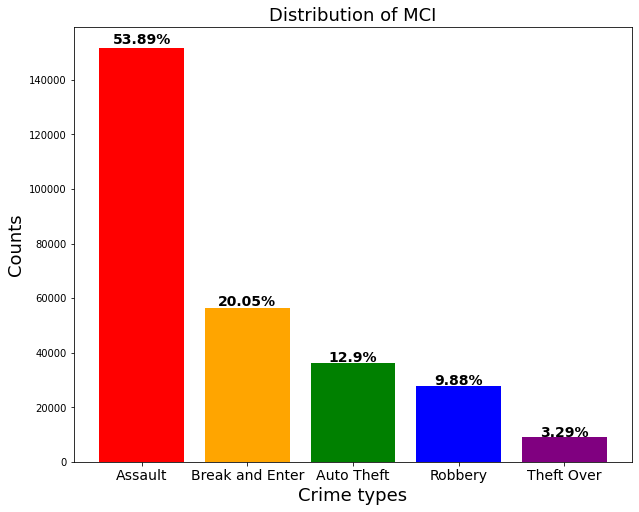

In [ ]:
# Bar graph
plt.figure(figsize=(10,8))
colors =['Red', 'Orange', 'Green', 'Blue', 'Purple']
graph = plt.bar(mci_bar.Crime_type, mci_bar.Counts, color=colors)
plt.title('Distribution of MCI', fontsize=18)
i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2,
           y+height*1.01,
           str(mci_bar.Percentage[i])+'%',
           ha='center',
           fontsize=14,
           weight='bold')
  i+=1
plt.xlabel('Crime types', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

The categories in MCI are inbalanced.

2. Division 

In [ ]:
Division_bar = mci.Division.value_counts()
Division_bar

D51    24207
D55    22476
D32    21147
D31    20645
D14    20451
D41    20268
D43    20239
D23    17890
D52    17237
D42    17183
D22    17112
D53    14044
D33    12211
D12    12012
D11    11296
D13    10137
NSA     3137
Name: Division, dtype: int64

In [ ]:
Division_bar = Division_bar.reset_index()
Division_bar = Division_bar.rename(columns = {'Division' : 'Counts'})
Division_bar = Division_bar.rename(columns = {'index' : 'Division'})
Division_bar

,Division,Counts
0,D51,24207
1,D55,22476
2,D32,21147
3,D31,20645
4,D14,20451
5,D41,20268
6,D43,20239
7,D23,17890
8,D52,17237
9,D42,17183


In [ ]:
percentage = []
total_counts = Division_bar.Counts.sum()
for i in range(Division_bar.shape[0]):
  pct = (Division_bar.Counts[i] / total_counts)*100
  percentage.append(round(pct, 2))
Division_bar['Percentage'] = percentage
Division_bar

,Division,Counts,Percentage
0,D51,24207,8.59
1,D55,22476,7.98
2,D32,21147,7.51
3,D31,20645,7.33
4,D14,20451,7.26
5,D41,20268,7.20
6,D43,20239,7.18
7,D23,17890,6.35
8,D52,17237,6.12
9,D42,17183,6.10


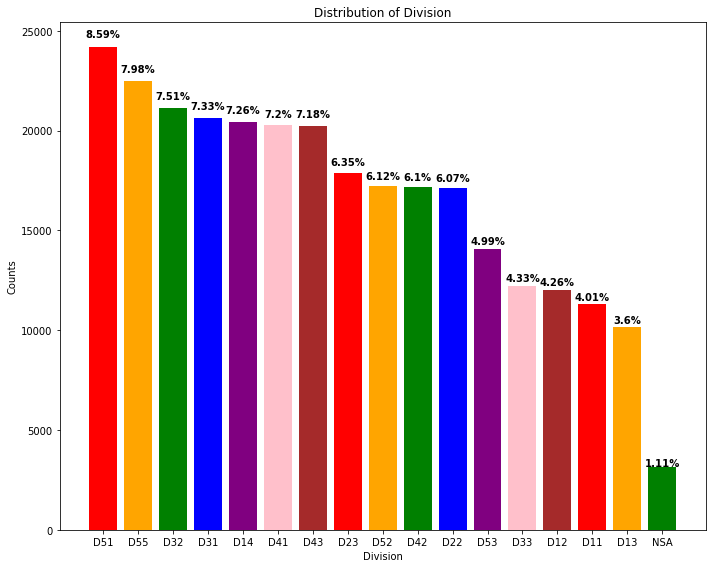

In [ ]:
# Bar graph
plt.figure(figsize=(10,8))
colors =['Red', 'Orange', 'Green', 'Blue', 'Purple', 'Pink', 'Brown']
graph = plt.bar(Division_bar.Division, Division_bar.Counts, color=colors)
plt.title('Distribution of Division')
i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2,
           y+height*1.02,
           str(Division_bar.Percentage[i])+'%',
           ha='center',
           weight='bold')
  i+=1
plt.xlabel('Division')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

3. premises_type

In [ ]:
premises_type_bar = mci.premises_type.value_counts()
premises_type_bar

Outside        74899
Apartment      67468
Commercial     56973
House          50689
Other          16394
Transit         7886
Educational     7383
Name: premises_type, dtype: int64

In [ ]:
premises_type_bar = premises_type_bar.reset_index()
premises_type_bar = premises_type_bar.rename(columns = {'index' : 'Premises_type'})
premises_type_bar = premises_type_bar.rename(columns = {'premises_type' : 'Counts'})
premises_type_bar

,Premises_type,Counts
0,Outside,74899
1,Apartment,67468
2,Commercial,56973
3,House,50689
4,Other,16394
5,Transit,7886
6,Educational,7383


In [ ]:
percentage = []
total_counts = premises_type_bar.Counts.sum()
for i in range(premises_type_bar.shape[0]):
  pct = (premises_type_bar.Counts[i] / total_counts)*100
  percentage.append(round(pct, 2))
premises_type_bar['Percentage'] = percentage
premises_type_bar

,Premises_type,Counts,Percentage
0,Outside,74899,26.59
1,Apartment,67468,23.95
2,Commercial,56973,20.23
3,House,50689,17.99
4,Other,16394,5.82
5,Transit,7886,2.80
6,Educational,7383,2.62


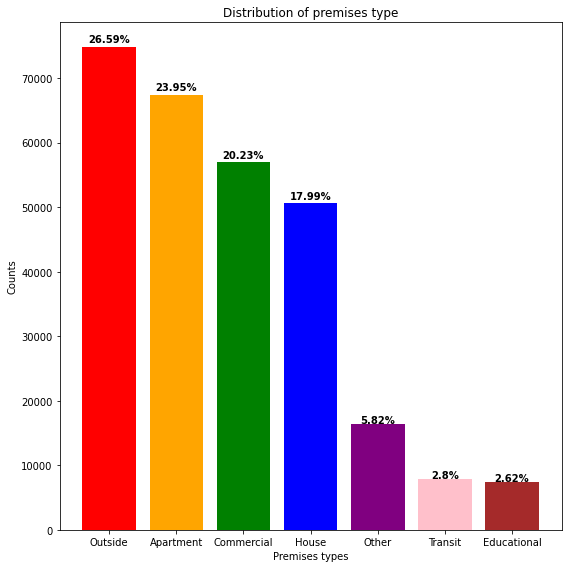

In [ ]:
# Bar graph
plt.figure(figsize=(8,8))
colors =['Red', 'Orange', 'Green', 'Blue', 'Purple', 'Pink', 'Brown']
graph = plt.bar(premises_type_bar.Premises_type, premises_type_bar.Counts, color=colors)
plt.title('Distribution of premises type')
i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2,
           y+height*1.01,
           str(premises_type_bar.Percentage[i])+'%',
           ha='center',
           weight='bold')
  i+=1
plt.xlabel('Premises types')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

4. reportedmonth 

In [ ]:
reportedmonth_bar = mci.reportedmonth.value_counts()
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
reportedmonth_bar = reportedmonth_bar.reindex(month)
reportedmonth_bar

January      22257
February     20247
March        22485
April        21930
May          23974
June         23914
July         25194
August       25003
September    24329
October      25231
November     24511
December     22617
Name: reportedmonth, dtype: int64

In [ ]:
reportedmonth_bar = reportedmonth_bar.reset_index()
reportedmonth_bar = reportedmonth_bar.rename(columns = {'index' : 'Month'})
reportedmonth_bar = reportedmonth_bar.rename(columns = {'reportedmonth' : 'Counts'})
reportedmonth_bar

,Month,Counts
0,January,22257
1,February,20247
2,March,22485
3,April,21930
4,May,23974
5,June,23914
6,July,25194
7,August,25003
8,September,24329
9,October,25231


In [ ]:
percentage = []
total_counts = reportedmonth_bar.Counts.sum()
for i in range(reportedmonth_bar.shape[0]):
  pct = (reportedmonth_bar.Counts[i] / total_counts)*100
  percentage.append(round(pct, 2))
reportedmonth_bar['Percentage'] = percentage
reportedmonth_bar

,Month,Counts,Percentage
0,January,22257,7.90
1,February,20247,7.19
2,March,22485,7.98
3,April,21930,7.79
4,May,23974,8.51
5,June,23914,8.49
6,July,25194,8.94
7,August,25003,8.88
8,September,24329,8.64
9,October,25231,8.96


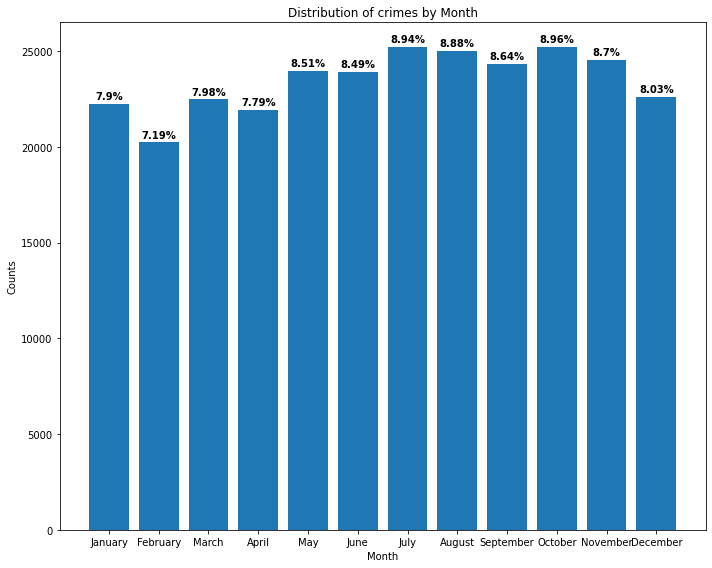

In [ ]:
# Bar graph
plt.figure(figsize=(10,8))
graph = plt.bar(reportedmonth_bar.Month, reportedmonth_bar.Counts)
plt.title('Distribution of crimes by Month')
i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2,
           y+height*1.01,
           str(reportedmonth_bar.Percentage[i])+'%',
           ha='center',
           weight='bold')
  i+=1
plt.xlabel('Month')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

5. reportedday

In [ ]:
reportedday_bar = mci.reportedday.value_counts()
reportedday_bar

18    9602
20    9535
17    9505
22    9468
16    9428
23    9427
19    9352
9     9344
11    9317
1     9296
25    9262
13    9256
10    9248
12    9238
14    9225
7     9214
27    9209
28    9208
21    9194
4     9189
3     9189
24    9176
15    9133
8     9132
6     9119
2     9077
5     9041
26    9036
29    8497
30    8385
31    5390
Name: reportedday, dtype: int64

In [ ]:
reportedday_bar = reportedday_bar.reset_index()
reportedday_bar = reportedday_bar.rename(columns = {'index' : 'Day'})
reportedday_bar = reportedday_bar.rename(columns = {'reportedday' : 'Counts'})
reportedday_bar = reportedday_bar.sort_values('Day')
reportedday_bar = reportedday_bar.reset_index(drop=True)
reportedday_bar

,Day,Counts
0,1,9296
1,2,9077
2,3,9189
3,4,9189
4,5,9041
5,6,9119
6,7,9214
7,8,9132
8,9,9344
9,10,9248


In [ ]:
percentage = []
total_counts = reportedday_bar.Counts.sum()
for i in range(reportedday_bar.shape[0]):
  pct = (reportedday_bar.Counts[i] / total_counts)*100
  percentage.append(round(pct, 2))
reportedday_bar['Percentage'] = percentage
reportedday_bar

,Day,Counts,Percentage
0,1,9296,3.30
1,2,9077,3.22
2,3,9189,3.26
3,4,9189,3.26
4,5,9041,3.21
5,6,9119,3.24
6,7,9214,3.27
7,8,9132,3.24
8,9,9344,3.32
9,10,9248,3.28


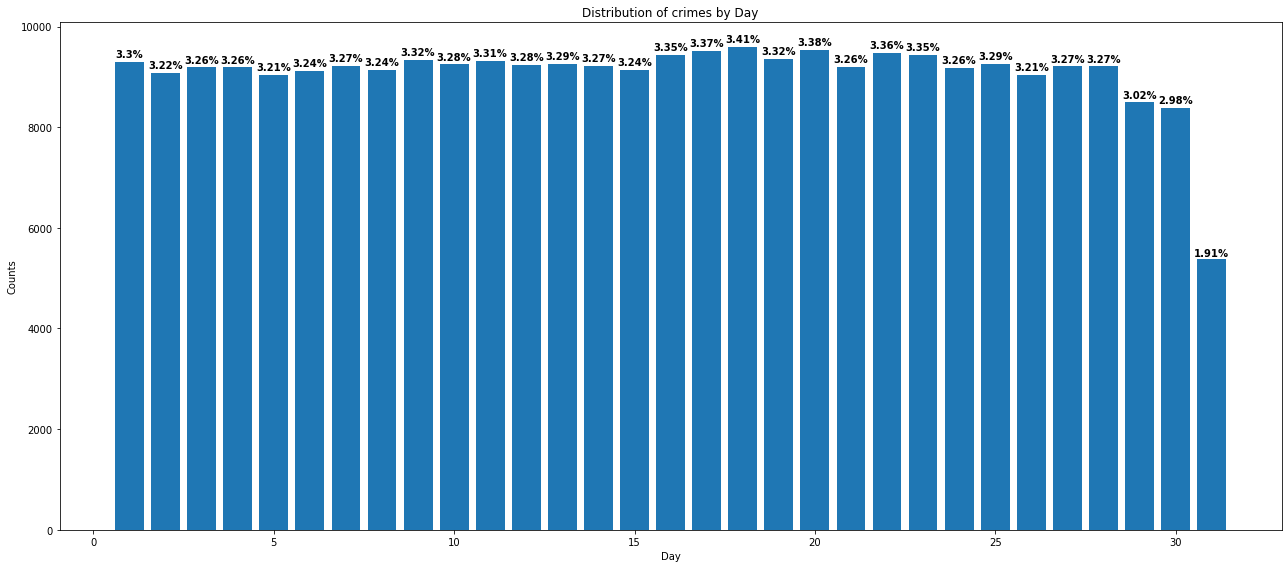

In [ ]:
# Bar graph
plt.figure(figsize=(18,8))
graph = plt.bar(reportedday_bar.Day, reportedday_bar.Counts)
plt.title('Distribution of crimes by Day')
i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2,
           y+height*1.01,
           str(reportedday_bar.Percentage[i])+'%',
           ha='center',
           weight='bold')
  i+=1
plt.xlabel('Day')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

6. reporteddayofweek

In [ ]:
reporteddayofweek_bar = mci.reporteddayofweek.value_counts()
reporteddayofweek_bar

Monday       41629
Friday       41318
Wednesday    40566
Tuesday      40456
Thursday     40090
Saturday     38992
Sunday       38641
Name: reporteddayofweek, dtype: int64

In [ ]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
reporteddayofweek_bar = reporteddayofweek_bar.reindex(week)
reporteddayofweek_bar

Monday       41629
Tuesday      40456
Wednesday    40566
Thursday     40090
Friday       41318
Saturday     38992
Sunday       38641
Name: reporteddayofweek, dtype: int64

In [ ]:
reporteddayofweek_bar = reporteddayofweek_bar.reset_index()
reporteddayofweek_bar = reporteddayofweek_bar.rename(columns = {'index' : 'Day_of_Week'})
reporteddayofweek_bar = reporteddayofweek_bar.rename(columns = {'reporteddayofweek' : 'Counts'})
reporteddayofweek_bar

,Day_of_Week,Counts
0,Monday,41629
1,Tuesday,40456
2,Wednesday,40566
3,Thursday,40090
4,Friday,41318
5,Saturday,38992
6,Sunday,38641


In [ ]:
percentage = []
total_counts = reporteddayofweek_bar.Counts.sum()
for i in range(reporteddayofweek_bar.shape[0]):
  pct = (reporteddayofweek_bar.Counts[i] / total_counts)*100
  percentage.append(round(pct, 2))
reporteddayofweek_bar['Percentage'] = percentage
reporteddayofweek_bar

,Day_of_Week,Counts,Percentage
0,Monday,41629,14.78
1,Tuesday,40456,14.36
2,Wednesday,40566,14.40
3,Thursday,40090,14.23
4,Friday,41318,14.67
5,Saturday,38992,13.84
6,Sunday,38641,13.72


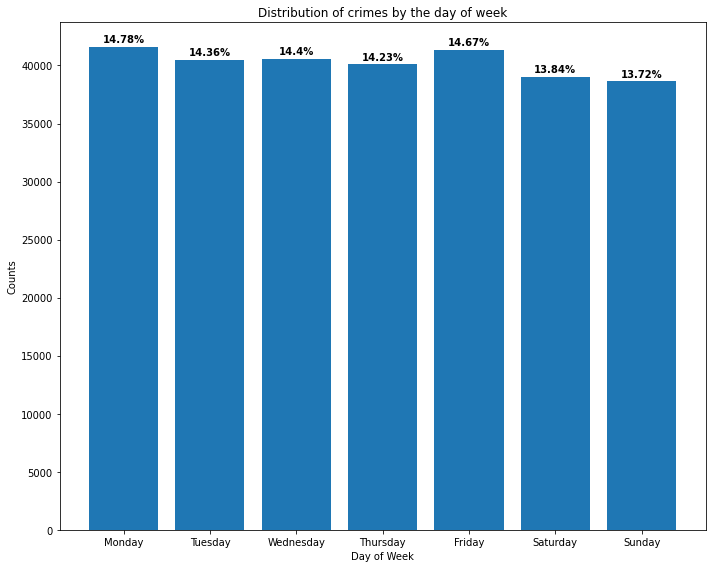

In [ ]:
# Bar graph
plt.figure(figsize=(10,8))
graph = plt.bar(reporteddayofweek_bar.Day_of_Week, reporteddayofweek_bar.Counts)
plt.title('Distribution of crimes by the day of week')
i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2,
           y+height*1.01,
           str(reporteddayofweek_bar.Percentage[i])+'%',
           ha='center',
           weight='bold')
  i+=1
plt.xlabel('Day of Week')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

7. reportedhour

In [ ]:
reportedhour_bar = mci.reportedhour.value_counts()

In [ ]:
reportedhour_bar = reportedhour_bar.reset_index()
reportedhour_bar = reportedhour_bar.rename(columns = {'index' : 'Hour'})
reportedhour_bar = reportedhour_bar.rename(columns = {'reportedhour' : 'Counts'})
reportedhour_bar = reportedhour_bar.sort_values('Hour')
reportedhour_bar = reportedhour_bar.reset_index(drop=True)
reportedhour_bar

,Hour,Counts
0,0,9788
1,1,9108
2,2,8695
3,3,7301
4,4,6066
5,5,5082
6,6,6658
7,7,9095
8,8,11274
9,9,13148


In [ ]:
percentage = []
total_counts = reportedhour_bar.Counts.sum()
for i in range(reportedhour_bar.shape[0]):
  pct = (reportedhour_bar.Counts[i] / total_counts)*100
  percentage.append(round(pct, 2))
reportedhour_bar['Percentage'] = percentage
reportedhour_bar

,Hour,Counts,Percentage
0,0,9788,3.47
1,1,9108,3.23
2,2,8695,3.09
3,3,7301,2.59
4,4,6066,2.15
5,5,5082,1.80
6,6,6658,2.36
7,7,9095,3.23
8,8,11274,4.00
9,9,13148,4.67


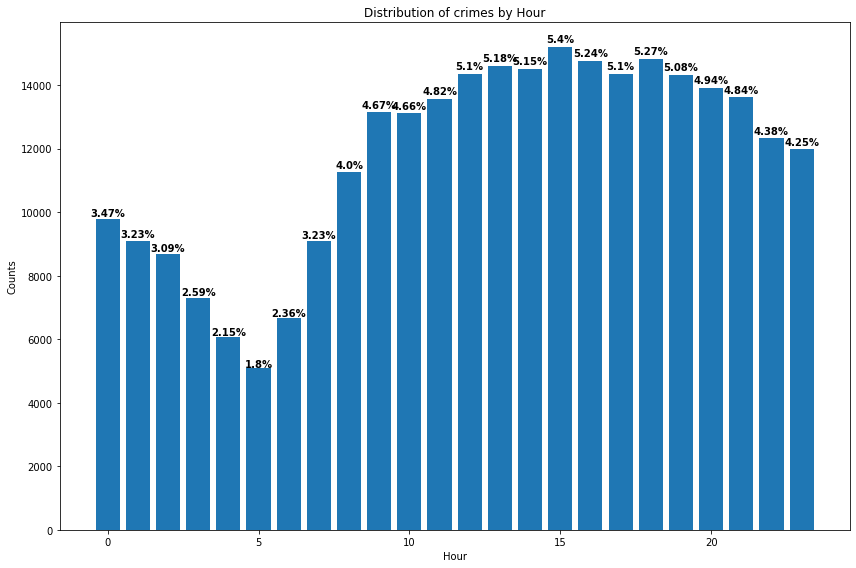

In [ ]:
# Bar graph
plt.figure(figsize=(12,8))
graph = plt.bar(reportedhour_bar.Hour, reportedhour_bar.Counts)
plt.title('Distribution of crimes by Hour')
i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2,
           y+height*1.01,
           str(reportedhour_bar.Percentage[i])+'%',
           ha='center',
           weight='bold')
  i+=1
plt.xlabel('Hour')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

8. Neighbourhood

In [ ]:
Neighbourhood_bar = mci.Neighbourhood.value_counts()
Neighbourhood_bar

Waterfront Communities-The Island    10488
Church-Yonge Corridor                 9341
Bay Street Corridor                   8062
West Humber-Clairville                7495
Moss Park                             6855
                                     ...  
Yonge-St.Clair                         543
Guildwood                              532
Maple Leaf                             507
Woodbine-Lumsden                       505
Lambton Baby Point                     425
Name: Neighbourhood, Length: 141, dtype: int64

In [ ]:
Neighbourhood_bar = Neighbourhood_bar.reset_index()
Neighbourhood_bar = Neighbourhood_bar.rename(columns = {'Neighbourhood' : 'Counts'})
Neighbourhood_bar = Neighbourhood_bar.rename(columns = {'index' : 'Neighbourhood'})
Neighbourhood_bar

,Neighbourhood,Counts
0,Waterfront Communities-The Island,10488
1,Church-Yonge Corridor,9341
2,Bay Street Corridor,8062
3,West Humber-Clairville,7495
4,Moss Park,6855
...,...,...
136,Yonge-St.Clair,543
137,Guildwood,532
138,Maple Leaf,507
139,Woodbine-Lumsden,505


In [ ]:
percentage = []
total_counts = Neighbourhood_bar.Counts.sum()
for i in range(Neighbourhood_bar.shape[0]):
  pct = (Neighbourhood_bar.Counts[i] / total_counts)*100
  percentage.append(round(pct, 2))
Neighbourhood_bar['Percentage'] = percentage
Neighbourhood_bar

,Neighbourhood,Counts,Percentage
0,Waterfront Communities-The Island,10488,3.72
1,Church-Yonge Corridor,9341,3.32
2,Bay Street Corridor,8062,2.86
3,West Humber-Clairville,7495,2.66
4,Moss Park,6855,2.43
...,...,...,...
136,Yonge-St.Clair,543,0.19
137,Guildwood,532,0.19
138,Maple Leaf,507,0.18
139,Woodbine-Lumsden,505,0.18


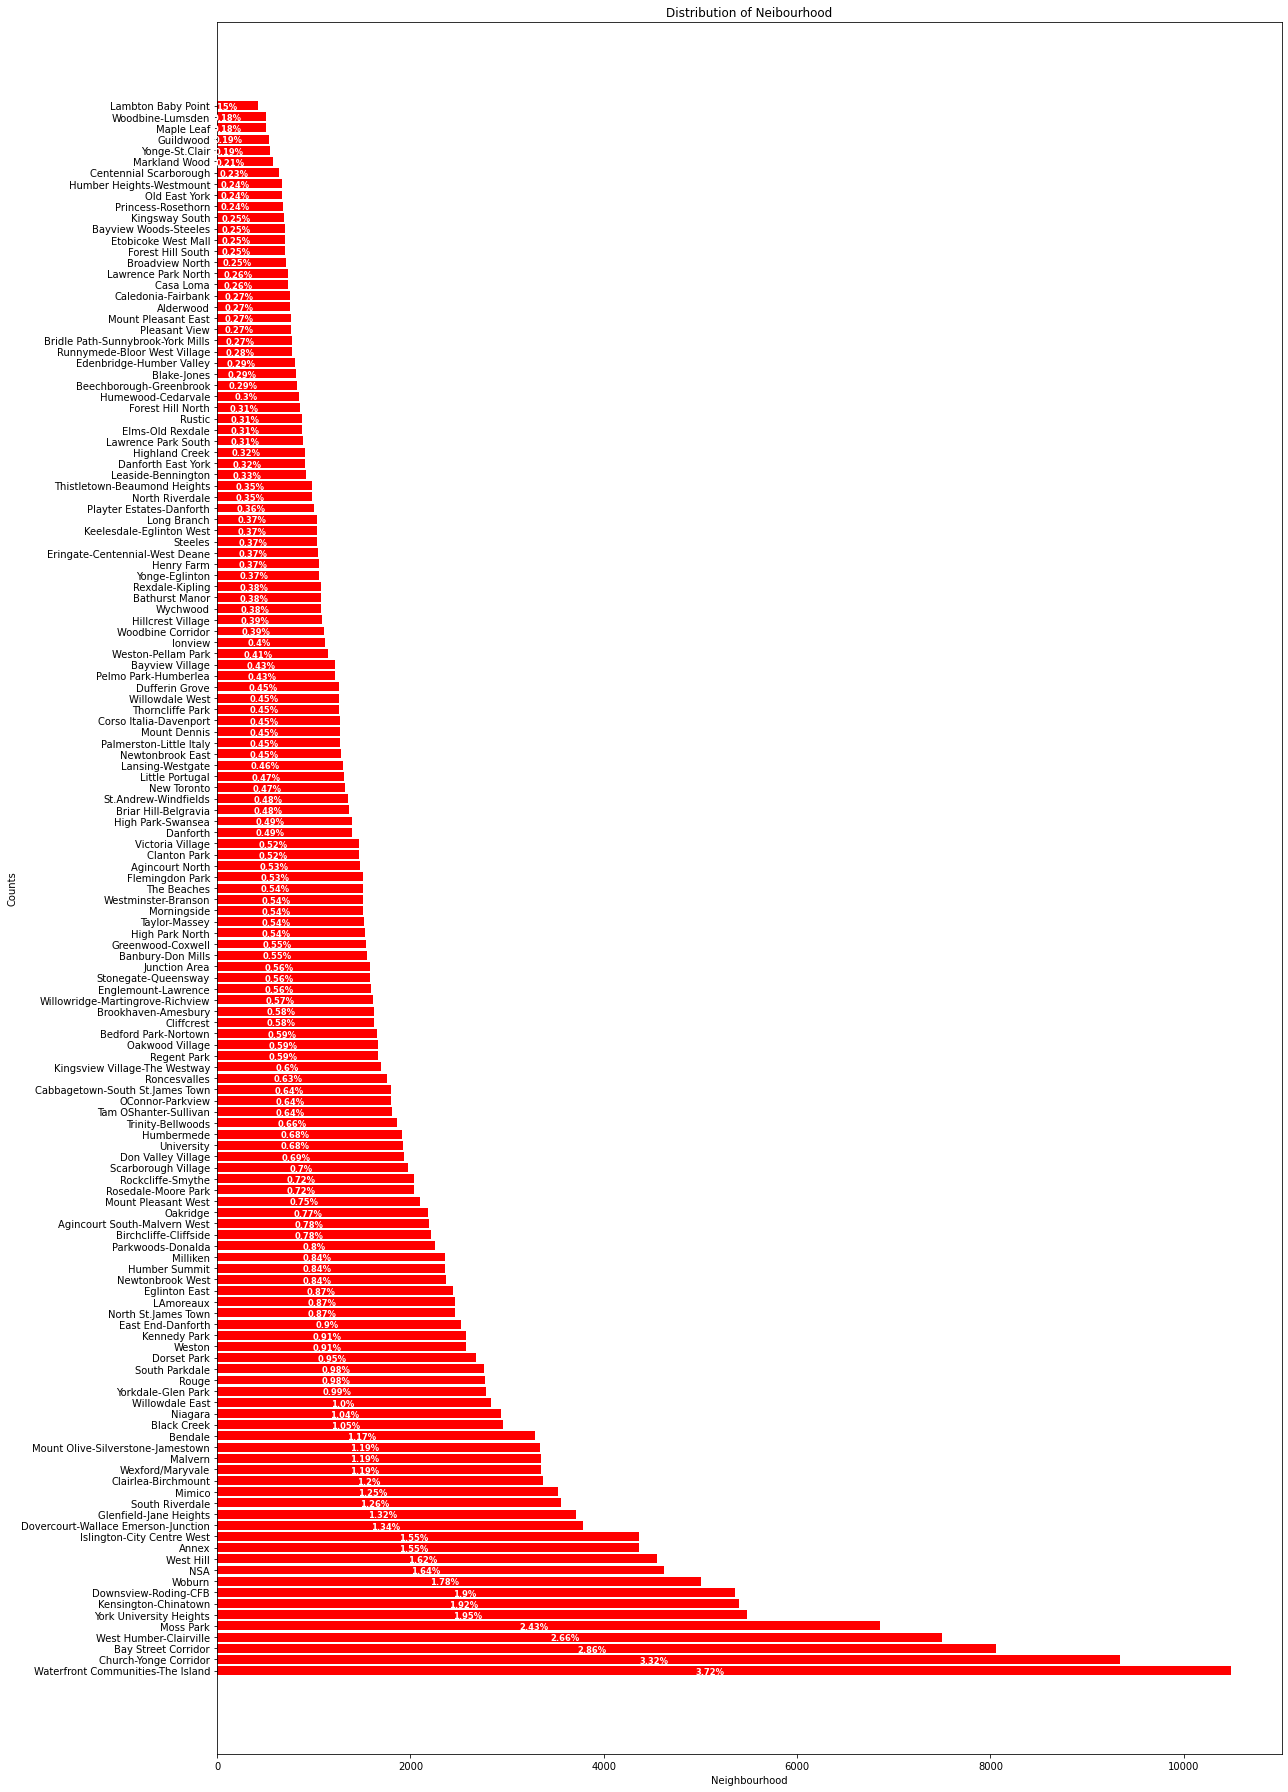

In [ ]:
# Bar graph
plt.figure(figsize=(18,25))
graph = plt.barh(Neighbourhood_bar.Neighbourhood, Neighbourhood_bar.Counts, color='red')

i = 0
for p in graph:
  width = p.get_width()+1
  height = p.get_height()-0.5
  x, y = p.get_xy()
  plt.text(x+width/2,
           y+height*1.05,
           str(Neighbourhood_bar.Percentage[i])+'%',
           ha='right',
           size='small',
           va='center',
           color='w',
           weight='bold')
  i+=1
plt.title('Distribution of Neibourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

**Heat map for categorical data**

In [ ]:
# Import the packages
import scipy.stats as ss
import seaborn as sns
import itertools 

In [ ]:
mci_heatmap = mci.drop(['Long', 'Lat'], axis=1)

In [ ]:
mci_heatmap.columns

Index(['Division', 'premises_type', 'reportedmonth', 'reportedday',
       'reporteddayofweek', 'reportedhour', 'MCI', 'Neighbourhood'],
      dtype='object')

Text(0.5, 1.0, 'Cramer V Correlation between Variables')

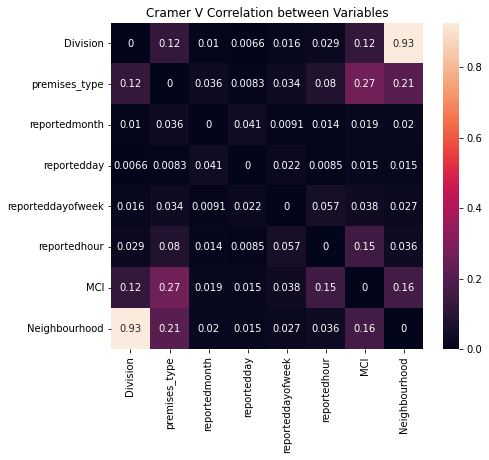

In [ ]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = ['Division', 'premises_type', 'reportedmonth', 'reportedday',
       'reporteddayofweek', 'reportedhour', 'MCI', 'Neighbourhood']
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(mci_heatmap[col1], mci_heatmap[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables")

**Variable exploration: numerical**

9. Long 

In [ ]:
mci['Long'].describe()

count    281692.000000
mean        -78.377824
std           8.934564
min         -80.039196
25%         -79.470433
50%         -79.392819
75%         -79.318798
max           0.000000
Name: Long, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


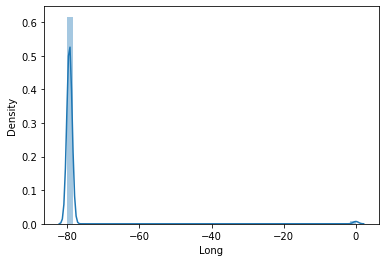

In [ ]:
sns.distplot(mci.Long)

10. Lat

In [ ]:
mci['Lat'].describe()

count    281692.000000
mean         43.146377
std           4.918359
min           0.000000
25%          43.659862
50%          43.699285
75%          43.751025
max          44.333691
Name: Lat, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


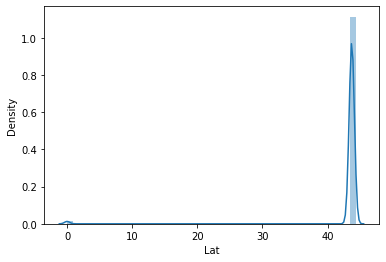

In [ ]:
sns.distplot(mci.Lat)

**Cap and Floor for Long and Lat**

Long

In [6]:
q = mci.Long.quantile(0.98)
q

-79.16874601

In [7]:
min = mci.Long.quantile(0.0008)
min

-79.69541471

In [8]:
mci_ll = mci.query('Long < @q')
mci_ll = mci_ll.query('Long > @min')
mci_ll.Long.describe()

count    275819.000000
mean        -79.397803
std           0.101980
min         -79.692683
25%         -79.473028
50%         -79.394585
75%         -79.326946
max         -79.168841
Name: Long, dtype: float64

In [ ]:
# Median
mci_ll.Long.median()

-79.39458503

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


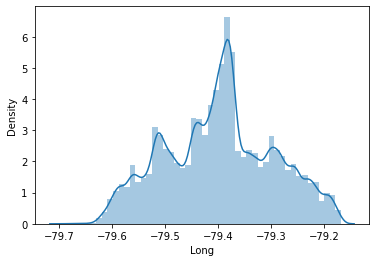

In [ ]:
sns.distplot(mci_ll.Long)

Lat

In [9]:
q2 = mci.Lat.quantile(0.02)
q2

43.60085066

In [10]:
max = mci.Lat.quantile(0.9996)
max

43.892980221868

In [11]:
mci_ll = mci_ll.query('Lat > @q2')
mci_ll = mci_ll.query('Lat < @max')
mci_ll.Lat.describe()

count    273819.000000
mean         43.707116
std           0.051873
min          43.600874
25%          43.661317
50%          43.700508
75%          43.750978
max          43.892897
Name: Lat, dtype: float64

In [ ]:
mci_ll.Lat.median()

43.70050771

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


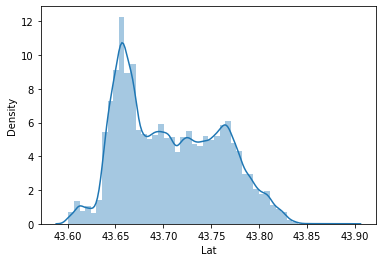

In [ ]:
sns.distplot(mci_ll.Lat)

In [13]:
mci_ll.shape

(273819, 10)

#Feature selection

**Random Forest**

In [12]:
# Import the packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
!pip install dmba
from dmba import classificationSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
no display found. Using non-interactive Agg backend


In [ ]:
# Define the predictors and outcome
predictors = ['Division', 'premises_type', 'reportedmonth', 'reportedday',
       'reporteddayofweek', 'reportedhour', 'Neighbourhood', 'Long',
       'Lat']
outcome = 'MCI'

In [ ]:
# Get dummies, define X and y, and split into train and test 
X = pd.get_dummies(mci_ll[predictors], drop_first=True)
y = mci_ll['MCI']
X_train, X_valid, y_train,y_valid = train_test_split(X,y, test_size=0.4, random_state=1, stratify=y)

In [ ]:
# Apply random forest
rf = SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=None, min_impurity_decrease=0.0))
rf.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
result = pd.DataFrame(rf.estimator_.feature_importances_, index=X.columns.values, columns=['feature importance'])
print(result)

                                       feature importance
Long                                             0.105437
Lat                                              0.102215
Division_D12                                     0.002130
Division_D13                                     0.002144
Division_D14                                     0.002663
...                                                   ...
Neighbourhood_Wychwood                           0.000629
Neighbourhood_Yonge-Eglinton                     0.000527
Neighbourhood_Yonge-St.Clair                     0.000348
Neighbourhood_York University Heights            0.001500
Neighbourhood_Yorkdale-Glen Park                 0.001211

[234 rows x 1 columns]


In [ ]:
rf.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
selected_feat= X_train.columns[(rf.get_support())]
len(selected_feat)

74

In [ ]:
print(selected_feat)

Index(['Long', 'Lat', 'premises_type_Commercial', 'premises_type_House',
       'premises_type_Other', 'premises_type_Outside', 'premises_type_Transit',
       'reportedmonth_August', 'reportedmonth_December',
       'reportedmonth_February', 'reportedmonth_January', 'reportedmonth_July',
       'reportedmonth_June', 'reportedmonth_March', 'reportedmonth_May',
       'reportedmonth_November', 'reportedmonth_October',
       'reportedmonth_September', 'reportedday_2', 'reportedday_3',
       'reportedday_4', 'reportedday_5', 'reportedday_6', 'reportedday_7',
       'reportedday_8', 'reportedday_9', 'reportedday_10', 'reportedday_11',
       'reportedday_12', 'reportedday_13', 'reportedday_14', 'reportedday_15',
       'reportedday_16', 'reportedday_17', 'reportedday_18', 'reportedday_19',
       'reportedday_20', 'reportedday_21', 'reportedday_22', 'reportedday_23',
       'reportedday_24', 'reportedday_25', 'reportedday_26', 'reportedday_27',
       'reportedday_28', 'reportedday_29', 

Division, Neighbourhood were not indentified as important variables.

**Drop the unimportant columns**

In [13]:
# Drop
mci_final = mci_ll.drop(['Division', 'Neighbourhood'], axis=1)

**Final selected columns**

In [ ]:
mci_final.columns

Index(['premises_type', 'reportedmonth', 'reportedday', 'reporteddayofweek',
       'reportedhour', 'MCI', 'Long', 'Lat'],
      dtype='object')

**train test split**

In [14]:
# Define the predictors and outcome, get dummies, and divide into train and validation
predictors = ['premises_type', 'reportedmonth', 'reportedday',
       'reporteddayofweek', 'reportedhour', 'Long',
       'Lat']
outcome = 'MCI'
X = pd.get_dummies(mci_final[predictors], drop_first=True)
y = mci_final['MCI']
X_train, X_valid, y_train,y_valid = train_test_split(X,y, test_size=0.4, random_state=1, stratify=y)

In [15]:
# Shape of train and validation data
print('Shape of X-train:', X_train.shape)
print('Shape of y-train:', y_train.shape)
print('Shape of X-valid:', X_valid.shape)
print('Shape of y-valid:', y_valid.shape)

Shape of X-train: (164291, 78)
Shape of y-train: (164291,)
Shape of X-valid: (109528, 78)
Shape of y-valid: (109528,)


#1st model: Random Forest

In [18]:
# Import the packages
from sklearn.ensemble import RandomForestClassifier
!pip install dmba
from dmba import classificationSummary
from sklearn.metrics import f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**GridSearch**

In [ ]:
# Import the package
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_sample_leaf': [1, 3, 5],
    'min_sample_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 100, None],
    'n_estimators': [100, 500, 1000]
}
# Create a based model
rf_base = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_base, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
# The best parameters
grid_search.best_params_

I ran the grid search more than 30 minutes, it did not finish even under GPU because of the capacity of my laptop. Therefore, I tuned the parameters manually. 

In [19]:
# Apply Random Forest
rfc = RandomForestClassifier(n_estimators=500, max_features='sqrt', max_depth=100,min_samples_split=2, min_samples_leaf=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, max_features='sqrt', n_estimators=500)

In [ ]:
classificationSummary(y_valid, rfc.predict(X_valid))

Confusion Matrix (Accuracy 0.6491)

       Prediction
Actual     0     1     2     3     4
     0 51515  2015  4434   923    65
     1  5744  6791  1347   258    42
     2 11396   711  9805    84   107
     3  6509   611   595  2952    16
     4  2208   423   903    38    36


In [ ]:
f1_score(y_valid, rfc.predict(X_valid), average='micro')

0.6488295230443357

# 2nd model: Random Forest with oversampling

**Oversampling**

In [ ]:
# import the packages
from imblearn.over_sampling import SMOTE

In [ ]:
# SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state =1)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
# MCI
y_res_bar = y_res.value_counts()
y_res_bar = pd.DataFrame(y_res_bar)
y_res_bar = y_res_bar.reset_index()
y_res_bar = y_res_bar.rename(columns = {'MCI' : 'Counts'})
y_res_bar = y_res_bar.rename(columns = {'index' : 'MCI'})
y_res_bar

,MCI,Counts
0,Assault,88428
1,Auto Theft,88428
2,Break and Enter,88428
3,Robbery,88428
4,Theft Over,88428


<Figure size 432x288 with 0 Axes>

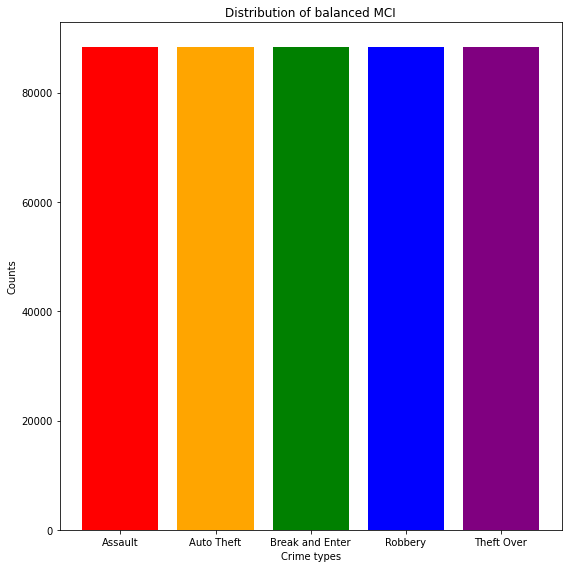

<Figure size 432x288 with 0 Axes>

In [ ]:
# Bar graph
plt.figure(figsize=(8,8))
colors =['Red', 'Orange', 'Green', 'Blue', 'Purple']
graph = plt.bar(y_res_bar.MCI, y_res_bar.Counts, color=colors)
plt.title('Distribution of balanced MCI')

plt.xlabel('Crime types')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()
plt.figure()

In [ ]:
# Random Forest with oversampling data
rfc_over = RandomForestClassifier(n_estimators=500, max_features='sqrt', max_depth=100,min_samples_split=2, min_samples_leaf=1)
rfc_over.fit(X_res,y_res)

In [ ]:
# Accuracy
classificationSummary(y_valid, rfc_over.predict(X_valid))

Confusion Matrix (Accuracy 0.5566)

       Prediction
Actual     0     1     2     3     4
     0 34713  5078  9787  6204  3170
     1  1882  8484  1444  1660   712
     2  5503  1337 12379   947  1937
     3  2917  1431   934  4920   481
     4   912   697  1153   383   463


In [ ]:
# F1 score
f1_score(y_valid, rfc_over.predict(X_valid), average='macro')

0.4419423153794084

#3rd model: XGboost

In [16]:
# import the package
from xgboost import XGBClassifier

In [17]:
# Apply XGboost
xg = XGBClassifier(early_stopping_rounds=10, learning_rate=0.3, subsample=1.0, min_child_weight=0)
xg.fit(X_train, y_train)

XGBClassifier(early_stopping_rounds=10, learning_rate=0.3, min_child_weight=0,
              objective='multi:softprob', subsample=1.0)

In [ ]:
# Accuracy
classificationSummary(y_valid, xg.predict(X_valid))

Confusion Matrix (Accuracy 0.6123)

       Prediction
Actual     0     1     2     3     4
     0 53001  1973  3896    82     0
     1  7069  5510  1556    47     0
     2 13173   507  8419     3     1
     3  9390   579   584   128     2
     4  2459   370   771     7     1


In [ ]:
# F1 score
f1_score(y_valid, xg.predict(X_valid), average='micro')

0.6122544007011905

#4th model: XGboost with oversampling

In [ ]:
# Apply XGboost with oversampling
xg2 = XGBClassifier(early_stopping_rounds=10, learning_rate=0.3, subsample=1.0, min_child_weight=0)
xg2.fit(X_res, y_res)

XGBClassifier(early_stopping_rounds=10, learning_rate=0.3, min_child_weight=0,
              objective='multi:softprob', subsample=1.0)

In [ ]:
# Accuracy
classificationSummary(y_valid, xg2.predict(X_valid))

Confusion Matrix (Accuracy 0.4556)

       Prediction
Actual     0     1     2     3     4
     0 23431  6035 13122 10136  6228
     1   915  8294  1668  2460   845
     2  4465  1123 12856   832  2827
     3  2169  1755  1295  4580   884
     4   584   696  1168   418   742


In [ ]:
# F1 score
f1_score(y_valid, xg2.predict(X_valid), average='macro')

0.3879825686619617

#5th model: MLP

In [ ]:
# Import the packages
from sklearn.neural_network import MLPClassifier

In [ ]:
# Apply MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=7, activation='logistic',solver='adam',random_state=1)
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=7, random_state=1)

In [ ]:
# Accuracy
classificationSummary(y_train, mlp.predict(X_train))

Confusion Matrix (Accuracy 0.5908)

       Prediction
Actual     0     1     2     3     4
     0 80725  2614  5089     0     0
     1 13299  6268  1707     0     0
     2 21808  1271 10075     0     0
     3 14784   375   865     0     0
     4  4104   385   922     0     0


In [ ]:
# F1 score
f1_score(y_valid, mlp.predict(X_valid), average='micro')

0.5885161785114309

#6th model: MLP with oversampling

In [ ]:
# MLP with oversampling data
mlp2 = MLPClassifier(hidden_layer_sizes=5, activation='logistic',solver='adam',random_state=1)
mlp2.fit(X_res,y_res)

MLPClassifier(activation='logistic', hidden_layer_sizes=5, random_state=1)

In [ ]:
# Accuracy
classificationSummary(y_valid, mlp2.predict(X_valid))

Confusion Matrix (Accuracy 0.5124)

       Prediction
Actual     0     1     2     3     4
     0 35747  4371 13042  3868  1924
     1  4835  6169  2070   942   166
     2  7867   764 12392   330   750
     3  6481  1050  1244  1671   237
     4  1598   547  1156   163   144


In [ ]:
# F1 score
f1_score(y_valid, mlp.predict(X_valid), average='macro')

0.2984129724768135

#The best model

Among all the models, 1st model (Random Forest) was the best based on accuracy and F1score.

**Predict a crime type with new data**

In [ ]:
row = [[-79.586443,43.697108,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000]]

In [ ]:
pred = rfc.predict(row)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pred

array(['Auto Theft'], dtype=object)

In [ ]:
print('Predicted Class:', pred)

Predicted Class: ['Auto Theft']


**Check the important variables in the best model**

In [18]:
# Import the packages
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
explainer = shap.TreeExplainer(model=xg)

In [20]:
shap_values = explainer.shap_values(X=X_train)

In [21]:
shap.summary_plot(shap_values, X_train, plot_type='bar')